# AIPI 590 - XAI | Assignment #4
### Explainable Deep Learning
### Kayla Haeussler

In [193]:
from pytorch_grad_cam import GradCAM
from torchvision.models import resnet50, ResNet50_Weights
from torchvision import transforms
import numpy as np
from pytorch_grad_cam import (
    GradCAM,
    ScoreCAM,
    GradCAMPlusPlus,
)
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
from torchvision.models import resnet50
from PIL import Image
import torch

 At Dr. bent's suggestion, I wanted to explore a meaningful topic, like road safety. I have been very fascinated by self driving cars, and thought this assignment could be an interesting way to explore how DL models interpret space and make their decisions. I was interested in looking at perception of road signs, specifically in the context of busy natural scenes. Understanding how models interpret traffic signs in complex environments is improtant because even small errors in perception can have major safety implications. The images I use in this analysis come from a dataset titled 'Chinese Traffic Signs in The Natural Scenes' from [Kaggle](https://www.kaggle.com/datasets/dmitryyemelyanov/chinese-traffic-signs-in-the-natural-scenes?select=images).  

 Due to my lack of familiarity at this point with computer vision and tensors in Python, ChatGPT5 was a great resource in completing this assignment. You will find citations where it was used to aid in code development 

In [194]:
# Previously was using pretrained=True (as shown in GradCAM documentation)
# but was getting an output error that that method is deprecated
# put error into Google and found setting a weights variable instead
weights = ResNet50_Weights.IMAGENET1K_V2
model = resnet50(weights=weights)
model.eval()
target_layers = [model.layer4[-1]]  # documentation says choose this for resnet50

In [195]:
# Chat-GPT 5 queried at 10:59 am on October 3rd, 2025
# I asked for help preprocessing my images to input into GradCAM
# I then put what ChatGPT yielded into a function since I knew I would be calling it
# on multiple images
# Link to ChatGPT chat:
# https://chatgpt.com/share/68e084e4-d6f8-8013-ad4c-c06ad9f5e639


# I am going to write this as a function since we are going to use it a lot
def image_preprocessing(img_path):
    preprocess = transforms.Compose(
        [
            transforms.Resize((224, 224)),
            transforms.ToTensor(),  # [0,1]
            transforms.Normalize(
                mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]  # ImageNet
            ),
        ]
    )
    # Keep a non-normalized RGB copy for visualization overlay
    rgb_img_pil = Image.open(img_path).convert("RGB")
    rgb_img_224 = rgb_img_pil.resize((224, 224))
    rgb_img = np.array(rgb_img_224).astype(np.float32) / 255.0  # for show_cam_on_image

    input_tensor = preprocess(rgb_img_pil).unsqueeze(0)  # (1,3,224,224)

    return input_tensor, rgb_img

I am going to run Grad-CAM, and the two variations, on one image at a time.  
For my two variations of Grad-CAM, I described my image classification task (stop sign detection) asked ChatGPT what variations of GradCAM might be interesting to explore. After reading through the options it suggested, I decided on GradCAM++ and ScoreCam
(ChatGPT 5, October 3rd, 2025 at 11:49am, conversation linked [here](https://chatgpt.com/share/68dff053-60dc-8013-b44e-af0ee06f7714))  

In [196]:
# defining CAM and its different variations
grad_cam = GradCAM(model=model, target_layers=target_layers)
grad_campp = GradCAMPlusPlus(model=model, target_layers=target_layers)
score_cam = ScoreCAM(model=model, target_layers=target_layers)

## Image 1  
When selecting 5 images from the large dataset, I specifically chose images which I thought had an interesint felement to see the different Grad-CAM variarions would respond. This first image has signs higher up and further back in the image, as well as a taxi topper that looks street sign like.

In [209]:
img_path = "imagedata/css_10.jpg"
input_tensor, rgb_img = image_preprocessing(img_path)

In [210]:
with torch.no_grad():
    outputs = model(input_tensor)
    pred_id = outputs.argmax(1).item()
# Above code generated by ChatGPT-5 at 11:15 am on October 3rd, 2025

# tells grad-CAM we are interested in 'street sign'
targets = [ClassifierOutputTarget(919)]
# source: https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a

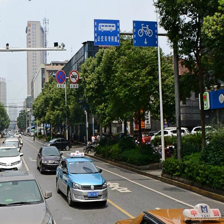

In [211]:
# want to print out the original image for reference
Image.fromarray((rgb_img * 255).astype("uint8"))

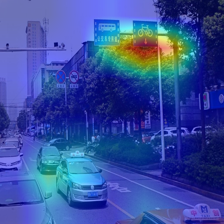

In [212]:
# referenced gradCAM documentation
grayscale_cam = grad_cam(input_tensor=input_tensor, targets=targets)[0]
vis = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)
Image.fromarray(vis)

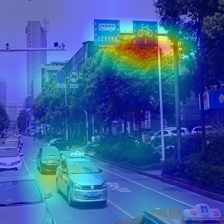

In [213]:
grayscale_cam = grad_campp(input_tensor=input_tensor, targets=targets)[0]
vis = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)
Image.fromarray(vis)

100%|██████████| 128/128 [04:00<00:00,  1.88s/it]


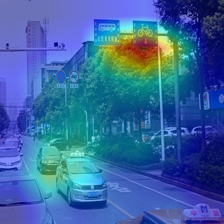

In [214]:
grayscale_cam = score_cam(input_tensor=input_tensor, targets=targets)[0]
vis = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)
Image.fromarray(vis)

There is not an extremely noticeable difference between the grad-CAM variants. They all do a solid job highlighting the blue road signs, but not as strongly as the signs in the background. They each have some light highlighting of the background signs, with base Grad-CAM doing the least. I am suprised to see that all three variants highlight the grey car in the foreground, it makes me wonder what would this car flags the model for a street sign, I am curious if we see similar behavior in the subsequent images.

## Image 2
This image is poorly lit, I am curious how/if that will affect the model

In [174]:
img_path = "imagedata/css_100.jpg"
input_tensor, rgb_img = image_preprocessing(img_path)

In [175]:
with torch.no_grad():
    outputs = model(input_tensor)
    pred_id = outputs.argmax(1).item()

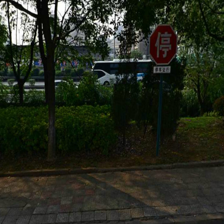

In [176]:
Image.fromarray((rgb_img * 255).astype("uint8"))

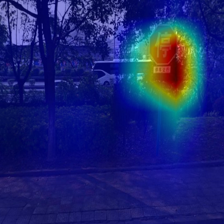

In [177]:
grayscale_cam = grad_cam(input_tensor=input_tensor, targets=targets)[0]
vis = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)
Image.fromarray(vis)

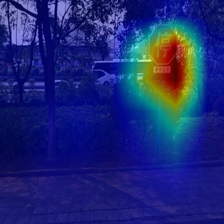

In [178]:
grayscale_cam = grad_campp(input_tensor=input_tensor, targets=targets)[0]
vis = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)
Image.fromarray(vis)

100%|██████████| 128/128 [03:59<00:00,  1.87s/it]


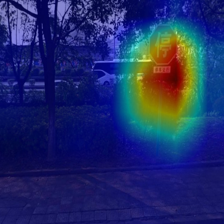

In [179]:
grayscale_cam = score_cam(input_tensor=input_tensor, targets=targets)[0]
vis = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)
Image.fromarray(vis)

The highlighting of all 3 variants is correct and focused. The ScoreCAM output is a bit more spreadout, seeming to be interested in the pole of the sign more than the other variants.

## Image 3  
In this image the signs are quite small, with one facing us and one facing away. There is also a large pole in the foreground, I am interested to see if the pole will flag our model as something street sign like.

In [180]:
img_path = "imagedata/css_103.jpg"
input_tensor, rgb_img = image_preprocessing(img_path)

In [181]:
with torch.no_grad():
    outputs = model(input_tensor)
    pred_id = outputs.argmax(1).item()

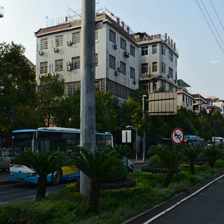

In [182]:
Image.fromarray((rgb_img * 255).astype("uint8"))

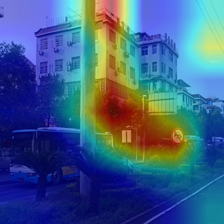

In [183]:
grayscale_cam = grad_cam(input_tensor=input_tensor, targets=targets)[0]
vis = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)
Image.fromarray(vis)

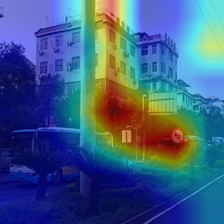

In [184]:
grayscale_cam = grad_campp(input_tensor=input_tensor, targets=targets)[0]
vis = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)
Image.fromarray(vis)

100%|██████████| 128/128 [03:59<00:00,  1.87s/it]


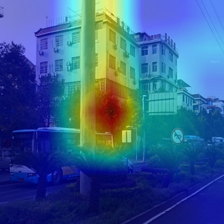

In [185]:
grayscale_cam = score_cam(input_tensor=input_tensor, targets=targets)[0]
vis = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)
Image.fromarray(vis)

Grad-CAM and Grad-CAM++ both correctly identify both of the signs, but spill into the background and seem to be distracted by the pole. Score CAM misses one of the signs entirely and, while also ditracted by the pole, does not have strong red concentration on the pole like the other two variants do.

## Image 4
Image has a stop sign on the left and red writing on the station next to it, there is also a atypical sign and red in the background on the awning that could be misleading to the model.

In [186]:
img_path = "imagedata/css_112.jpg"
input_tensor, rgb_img = image_preprocessing(img_path)

In [187]:
with torch.no_grad():
    outputs = model(input_tensor)
    pred_id = outputs.argmax(1).item()

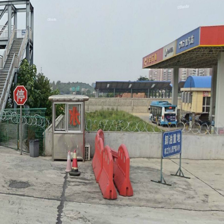

In [188]:
Image.fromarray((rgb_img * 255).astype("uint8"))

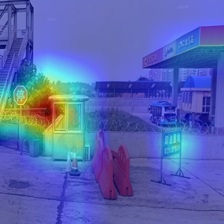

In [189]:
grayscale_cam = grad_cam(input_tensor=input_tensor, targets=targets)[0]
vis = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)
Image.fromarray(vis)

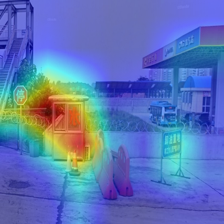

In [190]:
grayscale_cam = grad_campp(input_tensor=input_tensor, targets=targets)[0]
vis = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)
Image.fromarray(vis)

100%|██████████| 128/128 [03:57<00:00,  1.86s/it]


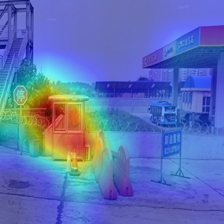

In [191]:
grayscale_cam = score_cam(input_tensor=input_tensor, targets=targets)[0]
vis = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)
Image.fromarray(vis)

All three variants identify the sign on the left side of the image, though I am surprised to see how much emphasis the model puts on the stand/station, specifically Grad-CAM++ and Score CAM have a lot of red on the station. I was curious how the model would respond to this since the stand has a large Chinese character on it, in the way a street sign would, but otherwise does not appear veery sign like. Additionally, GradCAM and GradCAM ++ pay some attention to the sign on the right while ScoreCAM does not as much. I am not sure if I would consider this a street sign in the traditonal sense of item so not sure whether we would or would not want the model to recognize a sign like this.

## Image 5
This image has the obvious street signs in the foreground, as well as some signs further away in the background, with one obstructed by a tree.

In [203]:
img_path = "imagedata/css_116.jpg"
input_tensor, rgb_img = image_preprocessing(img_path)

In [204]:
with torch.no_grad():
    outputs = model(input_tensor)
    pred_id = outputs.argmax(1).item()

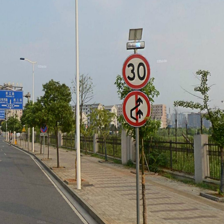

In [205]:
Image.fromarray((rgb_img * 255).astype("uint8"))

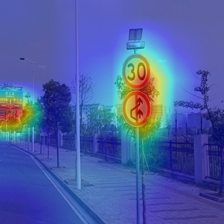

In [206]:
grayscale_cam = grad_cam(input_tensor=input_tensor, targets=targets)[0]
vis = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)
Image.fromarray(vis)

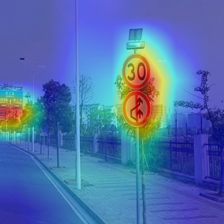

In [207]:
grayscale_cam = grad_campp(input_tensor=input_tensor, targets=targets)[0]
vis = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)
Image.fromarray(vis)

100%|██████████| 128/128 [04:00<00:00,  1.88s/it]


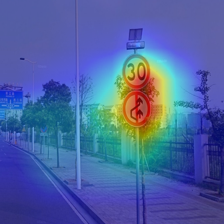

In [208]:
grayscale_cam = score_cam(input_tensor=input_tensor, targets=targets)[0]
vis = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)
Image.fromarray(vis)

All three variants have good attention on the '30' sign in the foreground, though they all miss the sign furhter back obstructed by trees. GradCAM and GradCAM++ do pay attention to the highway sign in the ground, as well as the yellow triangular sign, while ScoreCAM does not pay attention to this much.

# Final Reflections

Through the variants attention maps, I saw that our model consistently focused on the correct regions for traffic signs, but the extent and sharpness varied depending on the CAM method that was used. While GradCAM and GradCAM++ generally behaved pretty similarly and were more spreadout in their attention, Score CAM was much more focused and often did not capture all the street signs in the image as well as the other two variants. While running my code I found that ScoreCAM also took substantially longer to run (4 minutes vs instantenously). It was interesting interpreting these attention maps as I saw that the model was both attending to the meaningful aspects of the image, it also was distracted or missed out on elements in certain cases. In the context of my road safety and self driving car case study that I originally set out to explore, transparency and explainability of model decisions is crucial as even small misinterpretations of visual cues can lead to unsafe decisions. In a case like this being able to see why a model makes the prediction that it did and how our models interpret aspects of the road can help us strengthen the model's behavior and ensure safety on roads.